In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

In [2]:
# Load dataset (train split)
dataset = load_dataset("stanfordnlp/imdb")
df = pd.DataFrame(dataset['train'])

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

plain_text/train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

plain_text/test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

plain_text/unsupervised-00000-of-00001.p(…):   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [3]:
# Before handling: Check for missing values
print("Missing values before:")
print(df.isnull().sum())

Missing values before:
text     0
label    0
dtype: int64


In [4]:
# Handling missing data: Drop rows with missing text or label
df_clean = df.dropna(subset=['text', 'label'])

In [5]:
# After handling
print("\nMissing values after:")
print(df_clean.isnull().sum())
print(f"Rows before: {len(df)}, After: {len(df_clean)}")


Missing values after:
text     0
label    0
dtype: int64
Rows before: 25000, After: 25000


In [6]:
# Add review length for EDA
df_clean['review_length'] = df_clean['text'].apply(len)


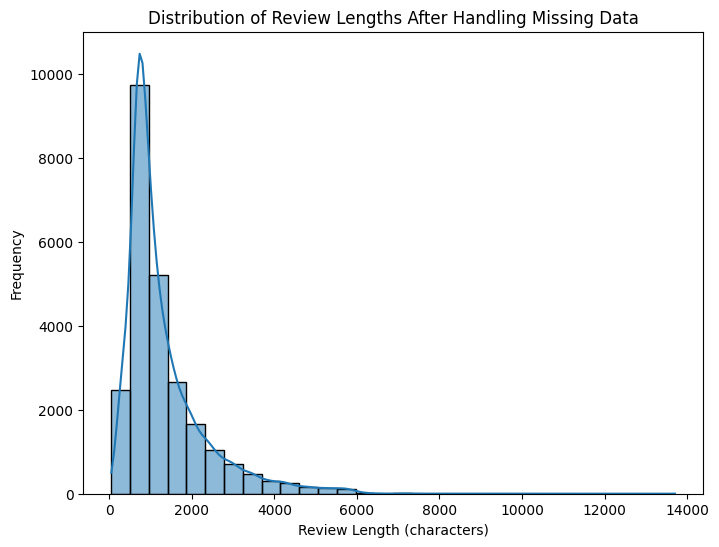

In [7]:
# EDA Visualization: Histogram of review lengths
plt.figure(figsize=(8, 6))
sns.histplot(df_clean['review_length'], bins=30, kde=True)
plt.title('Distribution of Review Lengths After Handling Missing Data')
plt.xlabel('Review Length (characters)')
plt.ylabel('Frequency')
plt.show()